# **SCIENTIFIC COMPUTING – FIRST LAB**

# **Development of an ESP32-Based Reference Instrument for Calibrating the Triple Point Temperature of Water.**

# **1.**

# **Abstract**

The need for accurate temperature measurements in various areas has driven this research work, which aims to design and develop a prototype standard for calibrating the 0 °C point. This system, based on an ESP32 microcontroller and a precision thermoresistance, has been designed to use the triple point of water as a reference. By providing a reliable and repeatable calibration method, the prototype will enable access to high-precision calibration. The work describes the calibration facilities, the procedure, the uncertainty analysis, and the quality control measures. It addresses the challenge of balancing metrological accuracy with efficiency, employing a strategy that includes statistical control and internal consistency measures to ensure device reliability during calibrations [1]. It is important to use a high-precision thermoresistance for the implementation of the prototype. One of the most accurate resistance thermometers for calibration due to its traceability, platinum purity, and construction is the SPRT (Standard Platinum Resistance Thermometer). Standard platinum resistance thermometers meet very specific requirements defined by the International Temperature Scale of 1990 (ITS-90). The objective is to develop a standard prototype for temperature calibration at 0 °C using an ESP32 microcontroller and a specific sensor that supports calibrations with the water triple point device. Once the measurement system has been obtained, we must perform stability, repeatability, and validation tests with all sources of uncertainty associated with the process.

# **2.**

Data loading and initial visualization:


*  *Date:* date of measurement.
*  *Day:* day of measurement.
*  *Time:* time at which the measurement was taken.
*  *Triplepointw:* measuring device used, in which 0 °C is guaranteed.
*  *SprtTemperature:* reference prototype implemented with an SPRT (standard platinum resistance thermometer) sensor.
*  *ReferenceTemperature:* reference thermometer used for direct comparison.
*  *SprtOhms:* values taken by the SPRT transducer in ohms.

A database with measurements taken during February 2025 was selected to visualize the behavior of the implemented instrument (SprtTemperature) and to obtain measurements at the triple point of water. It was also considered necessary to obtain the ohm value of the SPRT sensor (SprtOhms) and a reference instrument for direct comparison during temperature measurement (ReferenceTemperature). Since the triple point of water generates the necessary conditions to measure the 0 °C point, the above database allows the behavior of the implemented instrument (SprtTemperature) to be verified.

Proper data loading and handling

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls drive/MyDrive/s_programing/

1_DataTime_Point_TPW.csv  eda_oop_lab.py


Below is the structure of the first 10 measurements taken from the database selected for the exercise:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


path = "/content/drive/MyDrive/s_programing/1_DataTime_Point_TPW.csv"

df = pd.read_csv(path,sep=None, engine="python")
print(df.head(10))

         Date       Day      Time  TriplePointw  SprtTemperature  \
0  2025-02-01  Saturday  08:00:00           0.0         0.000211   
1  2025-02-01  Saturday  08:06:00           0.0        -0.003366   
2  2025-02-01  Saturday  08:10:00           0.0        -0.000643   
3  2025-02-01  Saturday  08:12:00           0.0         0.001813   
4  2025-02-01  Saturday  08:12:00           0.0         0.000623   
5  2025-02-01  Saturday  08:14:00           0.0         0.001121   
6  2025-02-01  Saturday  08:18:00           0.0         0.003850   
7  2025-02-01  Saturday  08:18:00           0.0         0.003831   
8  2025-02-01  Saturday  08:18:00           0.0         0.002953   
9  2025-02-01  Saturday  08:18:00           0.0        -0.001503   

   ReferenceTemperature  SprtOhms  
0             -0.001764  1000.000  
1             -0.002924   999.987  
2             -0.002250   999.998  
3             -0.001265  1000.010  
4              0.003251  1000.000  
5              0.001797  1000.000  

In [4]:
df.columns

Index(['Date', 'Day', 'Time', 'TriplePointw', 'SprtTemperature',
       'ReferenceTemperature', 'SprtOhms'],
      dtype='object')

In [5]:
def graph(date, n_point):

  sen_tem_p = df[df["Date"] == date]['ReferenceTemperature']
  sen_tem = df[df["Date"] == date]['SprtTemperature']

  tm = df[df["Date"] == date]["Time"]

  day = df[df["Date"] == date]["Day"].unique()

  plt.figure(figsize=(12,6))
  plt.plot(tm[:n_point], sen_tem_p[:n_point], label="SPRT", marker='o', markersize=3)
  plt.plot(tm[:n_point], sen_tem[:n_point], label="Ref", marker='x', markersize=3)

  plt.xlabel(f"Time {date}")
  plt.ylabel("Temperature (°C)")
  plt.title(f"Temperature Measurements - {day[0]} {date} (SPRT vs Ref)")
  plt.xticks(rotation=45)
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

In this section, we can observe the behavior of the implemented instrument (SprtTemperature) and the reference instrument (ReferenceTemperature). We must select the date and number of measurements we wish to evaluate:

In [6]:
date = "2025-02-18"
n_point = 50

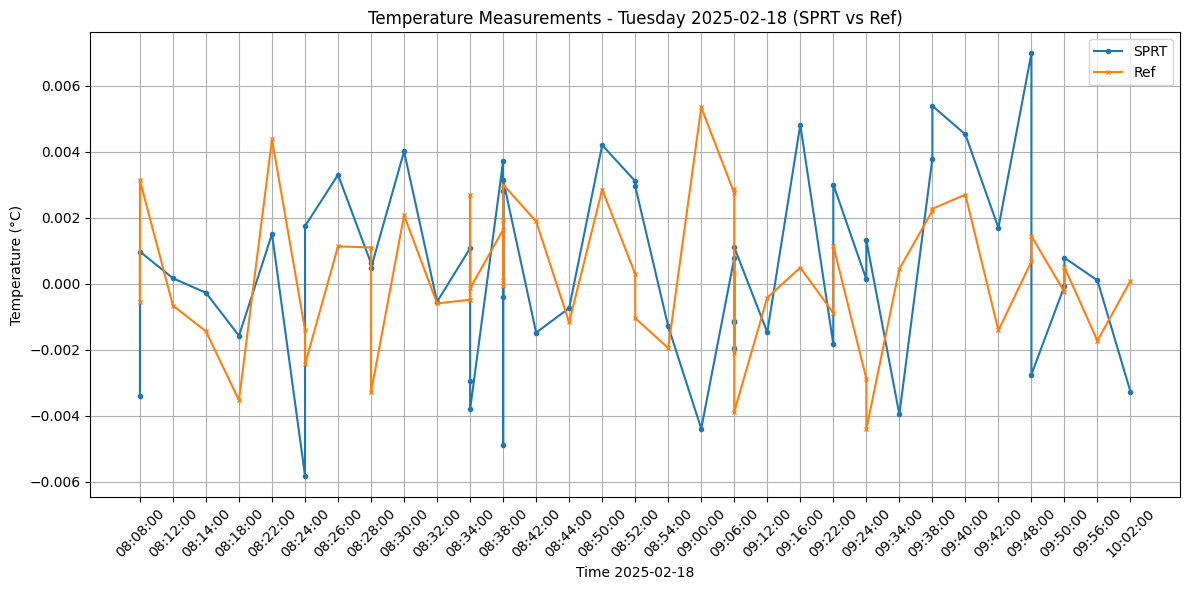

In [7]:
graph(date, n_point)

In [8]:
import numpy as np

In this section, we can obtain the average of the measurements for the selected day, obtaining a result with 6 significant figures:

In [9]:
def mean_sprt_ref(date):

  sen_tem_ref = df[df["Date"] == date]['ReferenceTemperature']
  sen_tem_sprt = df[df["Date"] == date]['SprtTemperature']

  return np.mean(sen_tem_ref), np.mean(sen_tem_sprt)

In [10]:
date = "2025-02-04"

In [11]:
mean_tem_ref, mean_tem_sprt = mean_sprt_ref(date)
print(f"{mean_tem_ref: .6f}, {mean_tem_sprt: .6f}")

 0.000189,  0.000147


In this section, we start with a filter for dates, with the purpose of evaluating the average of daily measurements during the month of February in the implemented instrument (SprtTemperature) and the reference instrument (ReferenceTemperature):

In [12]:
for i in range(1, 29):
    date = f"2025-02-{i:02d}"


    df_day = df[df["Date"] == date]

    if not df_day.empty:
        mean_tem_ref = df_day["ReferenceTemperature"].mean()
        mean_tem_sprt = df_day["SprtTemperature"].mean()
        print(f"{date} -> ReferenceTemperature: {mean_tem_ref:.6f}, SprtTemperature: {mean_tem_sprt:.6f}")
    else:
        print(f"{date} -> No data")

2025-02-01 -> ReferenceTemperature: 0.000083, SprtTemperature: 0.000232
2025-02-02 -> ReferenceTemperature: -0.000188, SprtTemperature: 0.000161
2025-02-03 -> ReferenceTemperature: -0.000290, SprtTemperature: 0.000129
2025-02-04 -> ReferenceTemperature: 0.000189, SprtTemperature: 0.000147
2025-02-05 -> ReferenceTemperature: 0.000380, SprtTemperature: 0.000066
2025-02-06 -> ReferenceTemperature: 0.000261, SprtTemperature: 0.000377
2025-02-07 -> ReferenceTemperature: 0.000022, SprtTemperature: 0.000292
2025-02-08 -> ReferenceTemperature: 0.000280, SprtTemperature: 0.000117
2025-02-09 -> ReferenceTemperature: -0.000096, SprtTemperature: -0.000122
2025-02-10 -> ReferenceTemperature: 0.000384, SprtTemperature: 0.000004
2025-02-11 -> ReferenceTemperature: -0.000031, SprtTemperature: 0.000234
2025-02-12 -> ReferenceTemperature: 0.000092, SprtTemperature: -0.000086
2025-02-13 -> ReferenceTemperature: -0.000236, SprtTemperature: 0.000291
2025-02-14 -> ReferenceTemperature: 0.000038, SprtTempera

In this section, measurements are taken during the month of February in order to evaluate the average of the daily measurements and the dispersion of their data with the standard deviation in the implemented instrument (SprtTemperature) and the reference instrument (ReferenceTemperature):

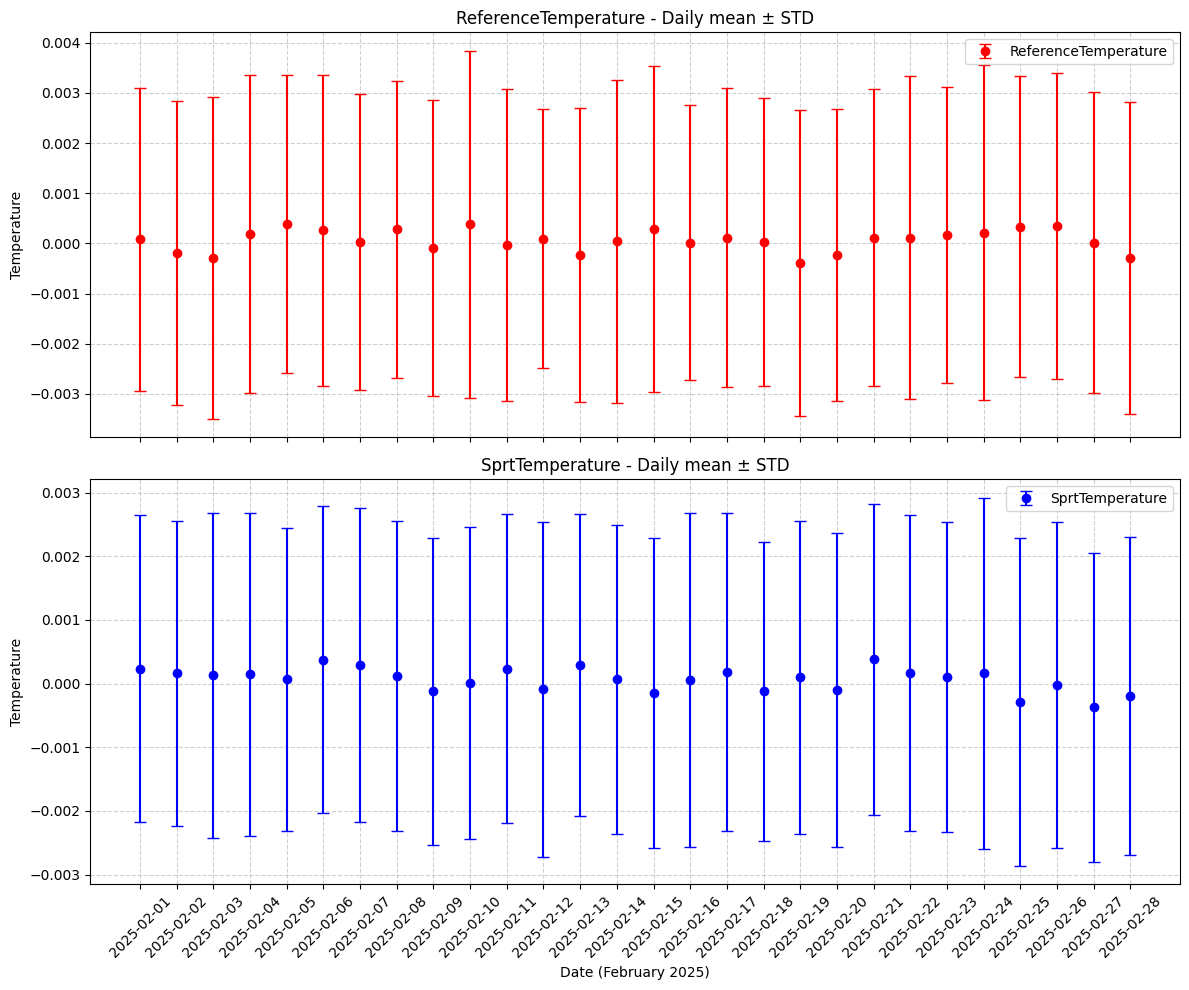

In [15]:
import matplotlib.pyplot as plt
import pandas as pd


list_mean_tem_ref = []
list_std_tem_ref = []
list_mean_tem_sprt = []
list_std_tem_sprt = []
list_date = []


for i in range(1, 29):
    date = f"2025-02-{i:02d}"
    df_day = df[df["Date"] == date]

    if not df_day.empty:
        list_mean_tem_ref.append(df_day["ReferenceTemperature"].mean())
        list_std_tem_ref.append(df_day["ReferenceTemperature"].std())
        list_mean_tem_sprt.append(df_day["SprtTemperature"].mean())
        list_std_tem_sprt.append(df_day["SprtTemperature"].std())
        list_date.append(date)


fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)


axes[0].errorbar(list_date, list_mean_tem_ref, yerr=list_std_tem_ref,
                 fmt='o', color="red", capsize=4, label="ReferenceTemperature")
axes[0].set_ylabel("Temperature")
axes[0].set_title("ReferenceTemperature - Daily mean ± STD")
axes[0].grid(True, linestyle="--", alpha=0.6)
axes[0].legend()


axes[1].errorbar(list_date, list_mean_tem_sprt, yerr=list_std_tem_sprt,
                 fmt='o', color="blue", capsize=4, label="SprtTemperature")
axes[1].set_xlabel("Date (February 2025)")
axes[1].set_ylabel("Temperature")
axes[1].set_title("SprtTemperature - Daily mean ± STD")
axes[1].grid(True, linestyle="--", alpha=0.6)
axes[1].legend()


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In this section, we obtain the correction according to the difference between the average daily measurements of the reference instrument (ReferenceTemperature) with respect to the implemented instrument (SprtTemperature). Subsequently, as a practical exercise, the correction is applied to the instrument under test and its behavior over time is observed:

In [16]:
for i in range(1, 29):
    date = f"2025-02-{i:02d}"


    df_day = df[df["Date"] == date]



    if not df_day.empty:
        mean_tem_ref = df_day["ReferenceTemperature"].mean()
        mean_tem_sprt = df_day["SprtTemperature"].mean()
        correccion = mean_tem_ref - mean_tem_sprt
        Sprtcorrec = mean_tem_sprt + correccion
        print(f"{date} -> ReferenceTemperature: {mean_tem_ref:.6f},  SprtTemperature: {mean_tem_sprt:.6f},  Correction: {correccion: .6f},  SprtCorrection: {Sprtcorrec: .6f}")


2025-02-01 -> ReferenceTemperature: 0.000083,  SprtTemperature: 0.000232,  Correction: -0.000149,  SprtCorrection:  0.000083
2025-02-02 -> ReferenceTemperature: -0.000188,  SprtTemperature: 0.000161,  Correction: -0.000348,  SprtCorrection: -0.000188
2025-02-03 -> ReferenceTemperature: -0.000290,  SprtTemperature: 0.000129,  Correction: -0.000419,  SprtCorrection: -0.000290
2025-02-04 -> ReferenceTemperature: 0.000189,  SprtTemperature: 0.000147,  Correction:  0.000043,  SprtCorrection:  0.000189
2025-02-05 -> ReferenceTemperature: 0.000380,  SprtTemperature: 0.000066,  Correction:  0.000314,  SprtCorrection:  0.000380
2025-02-06 -> ReferenceTemperature: 0.000261,  SprtTemperature: 0.000377,  Correction: -0.000116,  SprtCorrection:  0.000261
2025-02-07 -> ReferenceTemperature: 0.000022,  SprtTemperature: 0.000292,  Correction: -0.000270,  SprtCorrection:  0.000022
2025-02-08 -> ReferenceTemperature: 0.000280,  SprtTemperature: 0.000117,  Correction:  0.000163,  SprtCorrection:  0.00028

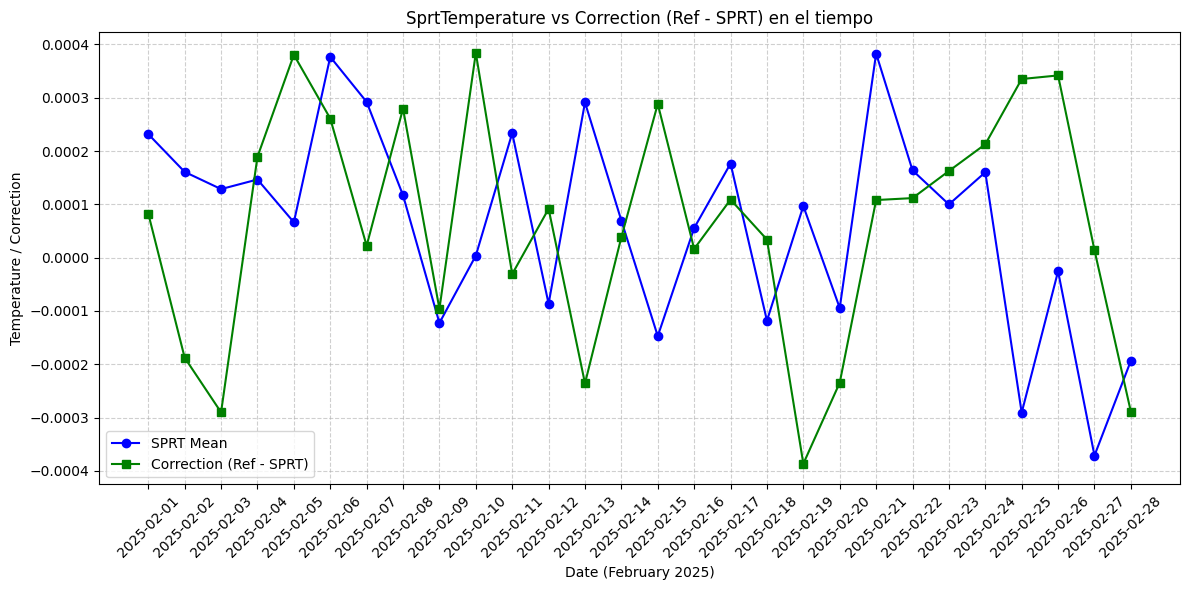

In [17]:
list_date = []
list_mean_sprt = []
list_correction = []

for i in range(1, 29):
    date = f"2025-02-{i:02d}"
    df_day = df[df["Date"] == date]

    if not df_day.empty:
        mean_tem_ref = np.mean(df_day["ReferenceTemperature"])
        mean_tem_sprt = np.mean(df_day["SprtTemperature"])

        correc = mean_tem_ref - mean_tem_sprt
        correc_sprt = mean_tem_sprt + correc

        list_date.append(date)
        list_mean_sprt.append(mean_tem_sprt)
        list_correction.append(correc_sprt)


plt.figure(figsize=(12,6))

plt.plot(list_date, list_mean_sprt, marker='o', color='blue', label="SPRT Mean")
plt.plot(list_date, list_correction, marker='s', color='green', label="Correction (Ref - SPRT)")

plt.xticks(rotation=45)
plt.xlabel("Date (February 2025)")
plt.ylabel("Temperature / Correction")
plt.title("SprtTemperature vs Correction (Ref - SPRT) en el tiempo")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In this section, we obtain the comparison of the corrected variable of the implemented instrument (SprtCorrection) with respect to the difference between the average daily measurements of the reference instrument (ReferenceTemperature):

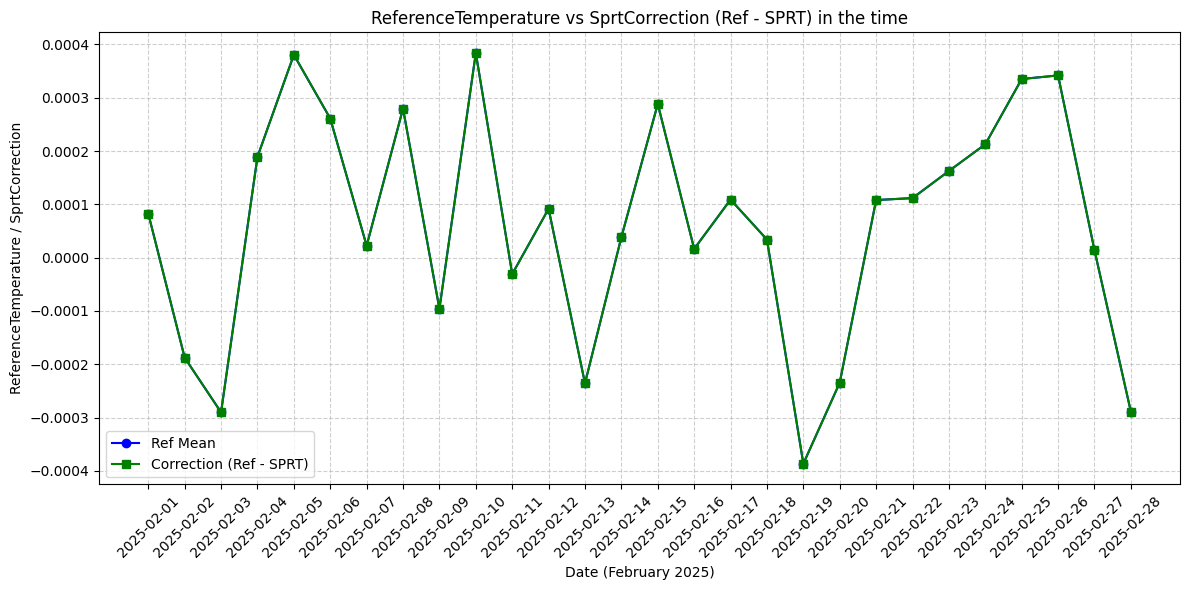

In [18]:
list_date = []
list_mean_ref = []
list_correction = []

for i in range(1, 29):
    date = f"2025-02-{i:02d}"
    df_day = df[df["Date"] == date]

    if not df_day.empty:
        mean_tem_ref = np.mean(df_day["ReferenceTemperature"])
        mean_tem_sprt = np.mean(df_day["SprtTemperature"])

        correc = mean_tem_ref - mean_tem_sprt
        correc_sprt = mean_tem_sprt + correc

        list_date.append(date)
        list_mean_ref.append(mean_tem_ref)
        list_correction.append(correc_sprt)


plt.figure(figsize=(12,6))

plt.plot(list_date, list_mean_ref, marker='o', color='blue', label="Ref Mean")
plt.plot(list_date, list_correction, marker='s', color='green', label="Correction (Ref - SPRT)")

plt.xticks(rotation=45)
plt.xlabel("Date (February 2025)")
plt.ylabel("ReferenceTemperature / SprtCorrection")
plt.title("ReferenceTemperature vs SprtCorrection (Ref - SPRT) in the time")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# **3.**

The TimeFilter class is created to select the day and the amount of study data per day.
TimeFilter standardizes the date and time, creates and converts DateTime, and offers methods to list days and filter by day. In summary, with this class we can perform a daily analysis of our database:

In [19]:
df = pd.read_csv("/content/drive/MyDrive/s_programing/1_DataTime_Point_TPW.csv")

class TimeFilter:
    def __init__(self, df: pd.DataFrame, time_col=None):
        self.df = df.copy()
        self.time_col = time_col
        self.__post_init__()

    def __post_init__(self):

        if "DateTime" in self.df.columns:
            self.df["DateTime"] = pd.to_datetime(self.df["DateTime"], errors="coerce")


        if ("DateTime" not in self.df.columns or self.df["DateTime"].isna().all()) and \
           ("Date" in self.df.columns and "Time" in self.df.columns):
            self.df["DateTime"] = pd.to_datetime(
                self.df["Date"].astype(str) + " " + self.df["Time"].astype(str),
                errors="coerce"
            )


        if "Date" in self.df.columns:
            self.df["Date"] = pd.to_datetime(self.df["Date"], errors="coerce")


        if self.time_col is None:
            if "DateTime" in self.df.columns and np.issubdtype(self.df["DateTime"].dtype, np.datetime64) and not self.df["DateTime"].isna().all():
                self.time_col = "DateTime"
            elif "Date" in self.df.columns and np.issubdtype(self.df["Date"].dtype, np.datetime64) and not self.df["Date"].isna().all():
                self.time_col = "Date"
            else:
                self.time_col = None

    def filter_by_day(self, day: str):
        if not self.time_col:
            return self.df.copy()
        d = pd.to_datetime(day).date()
        mask = self.df[self.time_col].dt.date == d
        return self.df.loc[mask].copy()

    def available_days(self):
        if not self.time_col:
            return []
        return sorted({d.date() for d in self.df[self.time_col].dropna()})


flt = TimeFilter(df)
days = flt.available_days()



if not days:
    print("A valid time column could not be constructed (DateTime/Date)")
else:
# Select the study day and the amount of data:
    target_day = str(days[1])
    df_day = flt.filter_by_day(target_day)
    from IPython.display import display
    display(df_day.head(5))

,Date,Day,Time,TriplePointw,SprtTemperature,ReferenceTemperature,SprtOhms,DateTime
168,2025-02-02,Sunday,08:04:00,0.0,-0.003621,0.001639,999.986,2025-02-02 08:04:00
169,2025-02-02,Sunday,08:08:00,0.0,-0.002171,-0.003725,999.992,2025-02-02 08:08:00
170,2025-02-02,Sunday,08:14:00,0.0,-0.001329,0.002853,999.995,2025-02-02 08:14:00
171,2025-02-02,Sunday,08:14:00,0.0,-0.001648,-0.005300,999.994,2025-02-02 08:14:00
172,2025-02-02,Sunday,08:16:00,0.0,0.001685,0.000400,1000.010,2025-02-02 08:16:00


This section is the graph or visualization that consumes the result filtered by the TimeFilter class based on SprtTemperature, ReferenceTemperature, and SprtOhms, the three variables with respect to time.

Below is an analysis of the three variables:

**SprtTemperature (°C)**
The temperature of the SPRT (standard reference thermometer) shows accurate data per day, according to the constant value of the medium (triple point cell of water).

**ReferenceTemperature (°C)**
The reference thermometer temperature is displayed per day of study with a behavior similar to the SPRT curve, but reveals a systematic error as observed previously when we made the corrections. Possible relative noise is also observed. Some isolated peaks indicate possible disturbances in the environment or due to agitation. It is considered appropriate to analyze the sources of uncertainty that can be attributed to the measurement procedure.

**SprtOhms (Ω)**
Small variations in resistance are observed, caused by very small thermal variations or environmental factors.


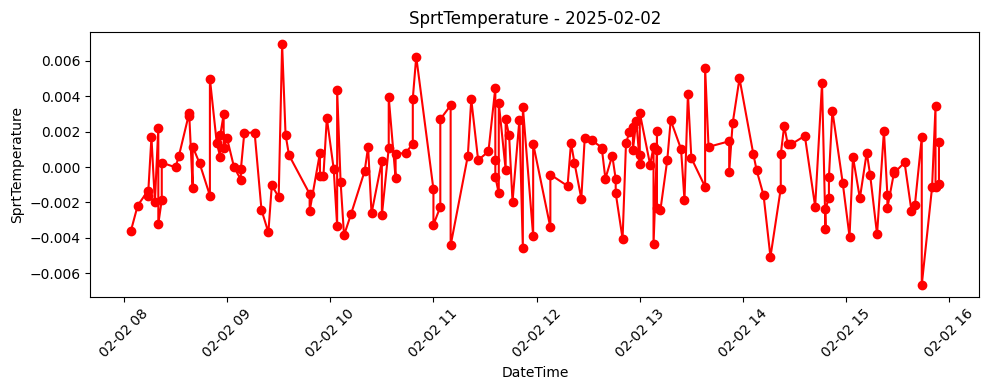

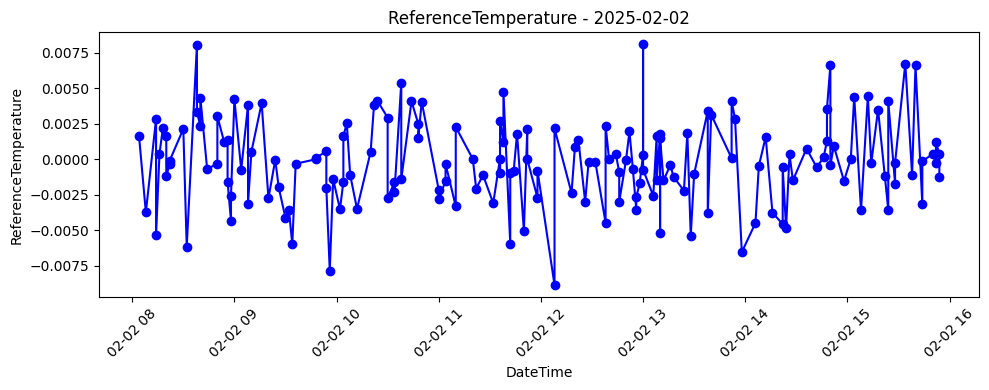

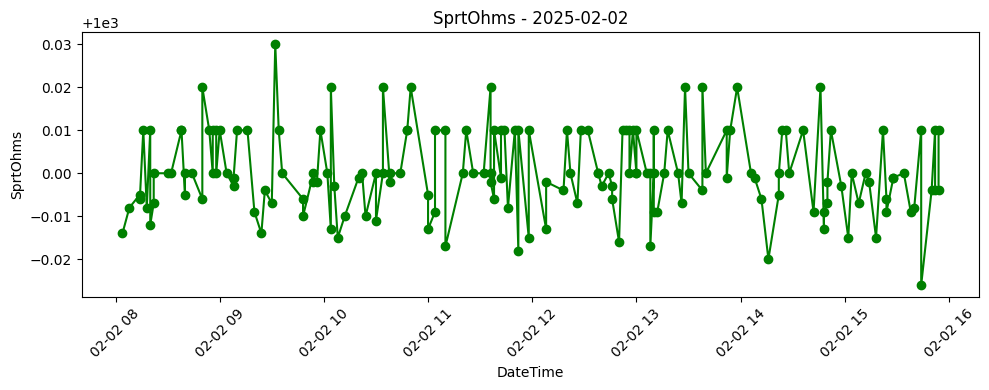

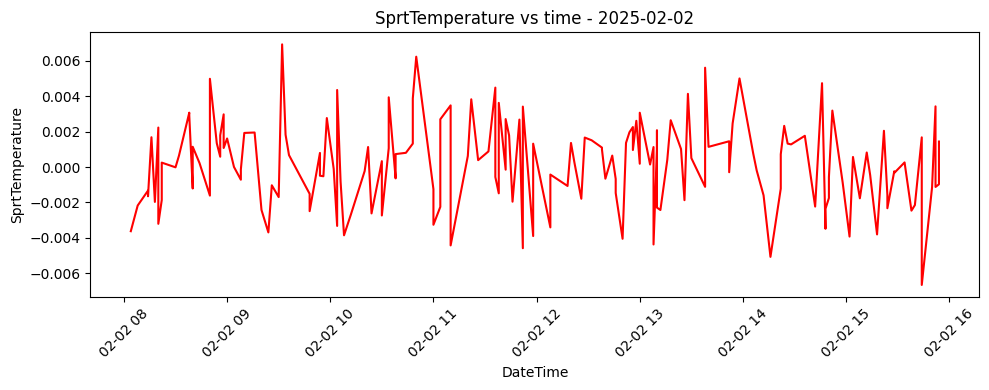

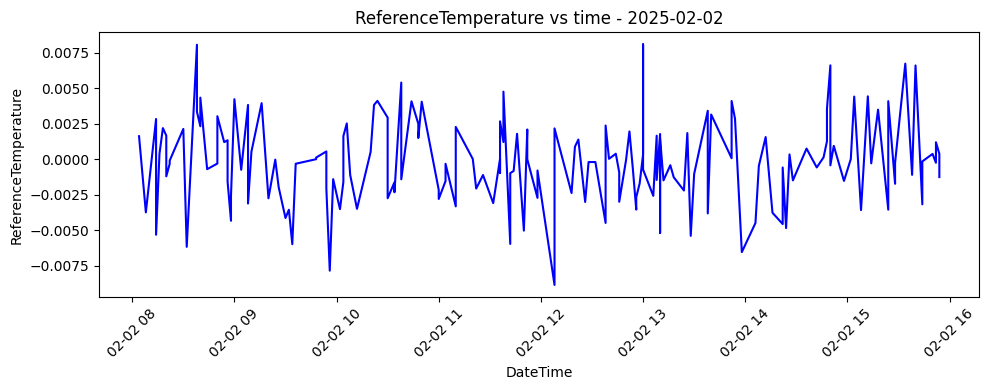

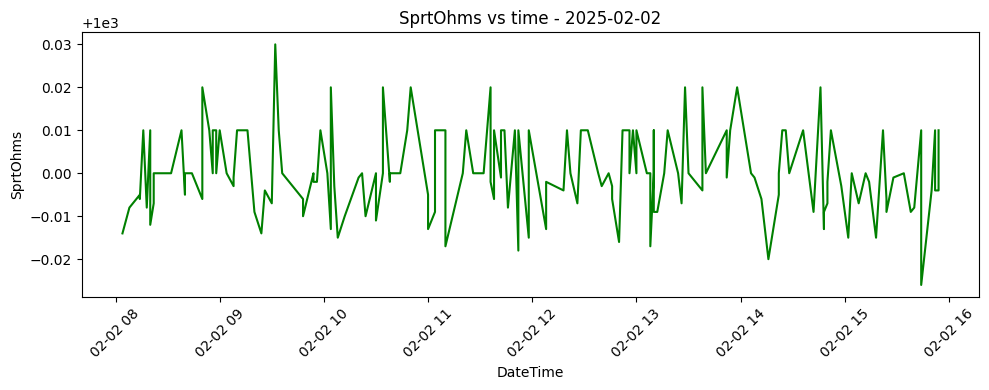

In [20]:
color_map = {
    "SprtTemperature": "red",
    "ReferenceTemperature": "blue",
    "SprtOhms": "green"
}


plot_cols = [c for c in ["SprtTemperature", "ReferenceTemperature", "SprtOhms"] if c in df_day.columns]

if "DateTime" not in df_day.columns:
    print("There is no ‘DateTime’ in the filtering; time series are not plotted.")
else:
    for col in plot_cols:
        tmp = df_day[["DateTime", col]].dropna().sort_values(by="DateTime")
        if tmp.empty:
            continue
        plt.figure(figsize=(10,4))
        plt.plot(tmp["DateTime"], tmp[col], marker="o", color=color_map.get(col, "black"))
        plt.title(f"{col} - {target_day}")
        plt.xlabel("DateTime"); plt.ylabel(col)
        plt.xticks(rotation=45); plt.tight_layout(); plt.show()


for col in plot_cols:
    tmp = df_day[["DateTime", col]].dropna().sort_values(by="DateTime")
    if not tmp.empty:
        plt.figure(figsize=(10,4))
        plt.plot(tmp["DateTime"], tmp[col], color=color_map.get(col, "black"))
        plt.title(f"{col} vs time - {target_day}")
        plt.xlabel("DateTime"); plt.ylabel(col)
        plt.xticks(rotation=45); plt.tight_layout(); plt.show()

In this section, the Visualizer class allows you to encapsulate data loading for later visualization and expose methods for plotting histograms of SprtTemperature, ReferenceTemperature, and SprtOhms.
The histograms allow you to evaluate the stability and noise of the SPRT and reference near the 0 °C medium.

Below is an analysis of the three variables:

**SprtTemperature:**
Centered data with narrow dispersion and symmetry are observed, indicating a normal distribution in accordance with the TPW (Triple Point of Water) medium and thanks to the SPRT transducer materials.

**ReferenceTemperature:**
The histogram indicates a normal distribution but with slightly more noise than the SPRT, possibly due to environmental factors during the procedure.

**SprtOhms:**
Indicates stable transducer values, slight variations, and constant stability.

Together, the three histograms show well-centered data with little dispersion and no atypical variations, consistent with stable measurement at the triple point of water.

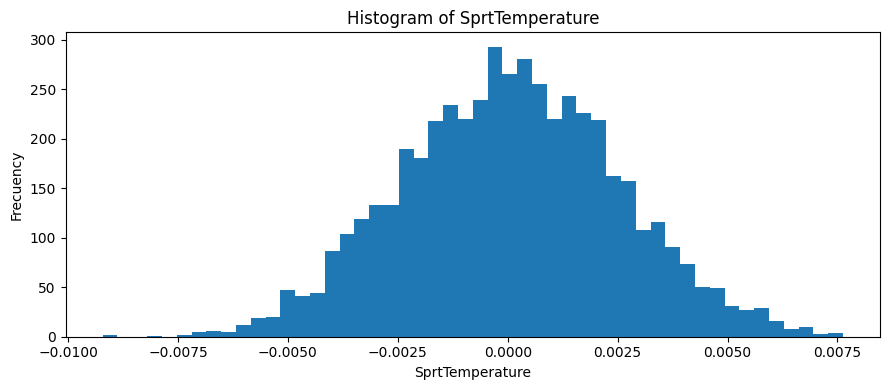

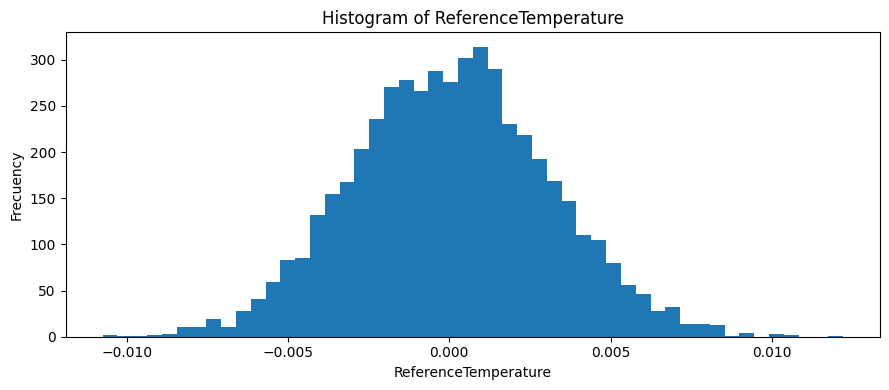

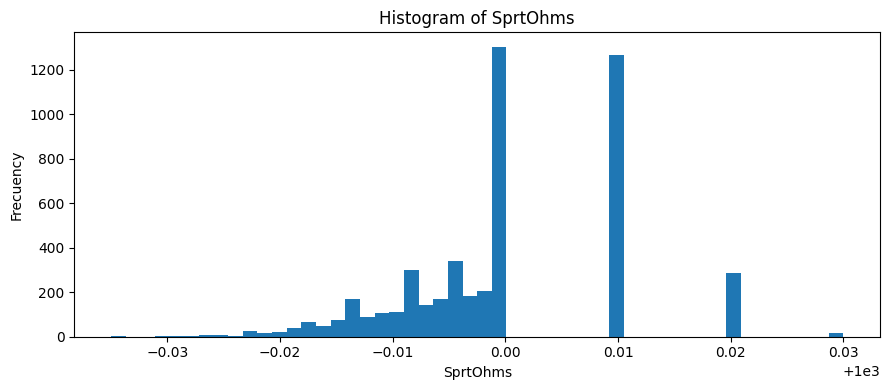

In [21]:
from typing import Optional, List
from pathlib import Path

class Visualizer:

    def __init__(self, df: pd.DataFrame):
        self.df = df.copy()

    @classmethod
    def from_csv(
        cls,
        path: Optional[str] = None,
        sep: str = ",",
        encoding: str = "utf-8"
    ):

        candidates: List[Path] = []
        if path:
            candidates.append(Path(path))

        candidates += [
            Path("/content/drive/MyDrive/s_programing/1_DataTime_Point_TPW.csv"),
            Path("1_DataTime_Point_TPW.csv"),
        ]

        for p in candidates:
            if p.is_file():
                df = pd.read_csv(p, sep=sep, encoding=encoding, low_memory=False)
                return cls(df)


        matches = list(Path(".").rglob("1_DataTime_Point_TPW*.csv"))
        if matches:
            df = pd.read_csv(matches[0], sep=sep, encoding=encoding, low_memory=False)
            return cls(df)



    def histogram(self, value_col: str, bins: int = 30, title: Optional[str] = None) -> None:

        if value_col not in self.df.columns:
            print(f"column message '{value_col}' does not exist in the DataFrame")
            return

        serie = self.df[value_col]
        if not np.issubdtype(serie.dtype, np.number):
            serie = pd.to_numeric(serie, errors="coerce")
        serie = serie.dropna()

        if serie.empty:
            print(f"No numerical data available  '{value_col}'.")
            return

        plt.figure(figsize=(9, 4))
        plt.hist(serie, bins=bins)
        plt.title(title or f"Histogram of {value_col}")
        plt.xlabel(value_col)
        plt.ylabel("Frecuency")
        plt.tight_layout()
        plt.show()

    def histograms(self, cols: List[str], bins: int = 30) -> None:

        for col in cols:
            self.histogram(col, bins=bins)

if __name__ == "__main__":

    viz = Visualizer.from_csv("/content/drive/MyDrive/s_programing/1_DataTime_Point_TPW.csv")

    viz.histograms(
        ["SprtTemperature", "ReferenceTemperature", "SprtOhms"],
        bins=50 )



# **4.**

In this section, the derivative of the SprtTemperature variable is calculated with respect to time using the TimeSeriesBase class as a starting point for the DataPrep and DerivativeCalculator subclasses, which inherit basic attributes for operating the derivative.

In [22]:
import pandas as pd
import numpy as np
from pathlib import Path

class TimeSeriesBase:
    def __init__(self, df: pd.DataFrame, time_col: str):
        self.df = df.copy()
        self.time_col = time_col

class DataPrep(TimeSeriesBase):
    def __call__(self) -> pd.DataFrame:
        df = self.df.copy()
        if (self.time_col not in df.columns) or (not np.issubdtype(df[self.time_col].dtype, np.datetime64)):
            if "Date" not in df.columns or "Time" not in df.columns:
                raise KeyError("Columns 'Date' and 'Time' or a valid 'DateTime' column are required.")
            df[self.time_col] = pd.to_datetime(
                df["Date"].astype(str) + " " + df["Time"].astype(str), errors="coerce"
            )
        df = df.dropna(subset=[self.time_col]).copy()
        df = df.groupby(self.time_col, as_index=False).mean(numeric_only=True)
        df = df.sort_values(self.time_col).reset_index(drop=True)
        return df

class DerivativeCalculator(TimeSeriesBase):
    def __init__(self, df: pd.DataFrame, time_col: str, value_col: str):
        super().__init__(df, time_col)
        self.value_col = value_col

    def __call__(self) -> pd.DataFrame:
        df = self.df.copy()
        t0 = df[self.time_col].iloc[0]
        t = (df[self.time_col] - t0).dt.total_seconds().to_numpy(dtype=float)
        y = pd.to_numeric(df[self.value_col], errors="coerce").to_numpy(dtype=float)
        mask = np.isfinite(y)
        if mask.sum() > 0 and (~mask).any():
            y[~mask] = np.interp(t[~mask], t[mask], y[mask])
        dy_dt = np.gradient(y, t) if len(y) >= 3 else np.full_like(y, np.nan, dtype=float)
        return pd.DataFrame({
            self.time_col: df[self.time_col],
            self.value_col: y,
            f"{self.value_col}_d_dt": dy_dt
        })

if __name__ == "__main__":
    CANDIDATES = [
        Path("/mnt/data/1_DataTime_Point_TPW.csv"),
        Path("/content/drive/MyDrive/s_programing/1_DataTime_Point_TPW.csv"),
        Path("1_DataTime_Point_TPW.csv"),
    ]
    for p in CANDIDATES:
        if p.is_file():
            df_raw = pd.read_csv(p, low_memory=False)
            break
    else:
        raise FileNotFoundError("CSV file not found in candidate paths.")
    prep = DataPrep(df_raw, time_col="DateTime")
    df_prepared = prep()
    der = DerivativeCalculator(df_prepared, time_col="DateTime", value_col="SprtTemperature")
    df_derivative = der()
    print(f"Processed rows: {len(df_derivative)}")
    mean_abs = float(np.nanmean(np.abs(df_derivative['SprtTemperature_d_dt'])))
    print(f"Average |d(SprtTemperature)/dt| (°C/s): {mean_abs:.6f}")
    print(df_derivative.head(15).to_string(index=False))

Processed rows: 3549
Average |d(SprtTemperature)/dt| (°C/s): 0.000011
           DateTime  SprtTemperature  SprtTemperature_d_dt
2025-02-01 08:00:00         0.000211         -9.937083e-06
2025-02-01 08:06:00        -0.003366          2.833057e-06
2025-02-01 08:10:00        -0.000643          1.412203e-05
2025-02-01 08:12:00         0.001218          7.351058e-06
2025-02-01 08:14:00         0.001121          1.074868e-06
2025-02-01 08:18:00         0.002283         -8.093235e-06
2025-02-01 08:20:00         0.000535         -8.891750e-06
2025-02-01 08:22:00         0.000149          6.950521e-08
2025-02-01 08:24:00         0.000552          8.905779e-06
2025-02-01 08:26:00         0.002286          5.859627e-06
2025-02-01 08:30:00        -0.000430         -2.389108e-06
2025-02-01 08:34:00         0.001139         -4.067023e-06
2025-02-01 08:36:00         0.000015         -3.589688e-06
2025-02-01 08:40:00         0.001928          2.117445e-05
2025-02-01 08:42:00         0.005261         

In this section, we observe in blue (SprtTemperature) the value of the SprtTemperature temperature with respect to time and the rate of change of temperature in red (dS/dt). Rapid transitions or disturbances near 0 °C suggest thermal equilibrium; if dS/dt is not significant over time, this indicates a stable system:

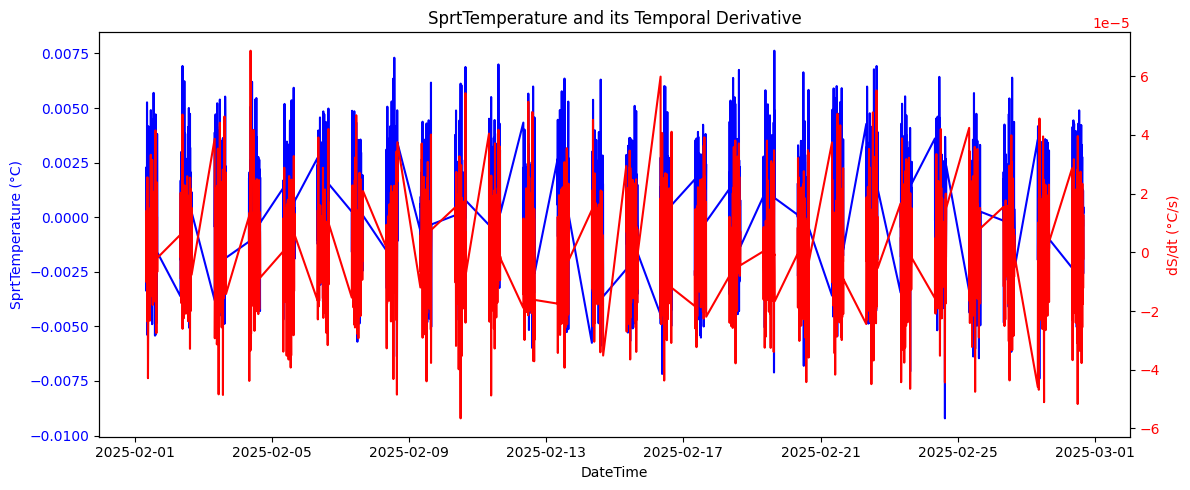

In [23]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(
    df_derivative["DateTime"],
    df_derivative["SprtTemperature"],
    color="blue",
    label="SprtTemperature"
)
ax1.set_xlabel("DateTime")
ax1.set_ylabel("SprtTemperature (°C)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(
    df_derivative["DateTime"],
    df_derivative["SprtTemperature_d_dt"],
    color="red",
    label="dS/dt"
)
ax2.set_ylabel("dS/dt (°C/s)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("SprtTemperature and its Temporal Derivative")
fig.tight_layout()
plt.show()

This section calculates the time derivative of the ReferenceTemperature variable in our database to quickly identify different phases of stability, heating, or cooling and report a summary average of the rate of change.

In [24]:
import pandas as pd
import numpy as np
from pathlib import Path

class TimeSeriesBase:
    def __init__(self, df: pd.DataFrame, time_col: str):
        self.df = df.copy()
        self.time_col = time_col

class DataPrep(TimeSeriesBase):
    def __call__(self) -> pd.DataFrame:
        df = self.df.copy()
        if (self.time_col not in df.columns) or (not np.issubdtype(df[self.time_col].dtype, np.datetime64)):
            if "Date" not in df.columns or "Time" not in df.columns:
                raise KeyError("Columns 'Date' and 'Time' or a valid 'DateTime' are required.")
            df[self.time_col] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"].astype(str), errors="coerce")
        df = df.dropna(subset=[self.time_col])
        df = df.groupby(self.time_col, as_index=False).mean(numeric_only=True)
        return df.sort_values(self.time_col).reset_index(drop=True)

class DerivativeCalculator(TimeSeriesBase):
    def __init__(self, df: pd.DataFrame, time_col: str, value_col: str):
        super().__init__(df, time_col)
        self.value_col = value_col
    def __call__(self) -> pd.DataFrame:
        df = self.df
        t0 = df[self.time_col].iloc[0]
        t = (df[self.time_col] - t0).dt.total_seconds().to_numpy(dtype=float)
        y = pd.to_numeric(df[self.value_col], errors="coerce").to_numpy(dtype=float)
        mask = np.isfinite(y)
        if mask.any() and (~mask).any():
            y[~mask] = np.interp(t[~mask], t[mask], y[mask])
        dy_dt = np.gradient(y, t) if len(y) >= 3 else np.full_like(y, np.nan, dtype=float)
        return pd.DataFrame({self.time_col: df[self.time_col], self.value_col: y, f"{self.value_col}_d_dt": dy_dt})

if __name__ == "__main__":
    for p in [Path("/mnt/data/1_DataTime_Point_TPW.csv"),
              Path("/content/drive/MyDrive/s_programing/1_DataTime_Point_TPW.csv"),
              Path("1_DataTime_Point_TPW.csv")]:
        if p.is_file():
            df_raw = pd.read_csv(p, low_memory=False)
            break
    else:
        raise FileNotFoundError("CSV not found in candidate paths.")

    df_prepared = DataPrep(df_raw, time_col="DateTime")()
    result = DerivativeCalculator(df_prepared, time_col="DateTime", value_col="ReferenceTemperature")()

    mean_abs = float(np.nanmean(np.abs(result["ReferenceTemperature_d_dt"])))
    print(f"Average |d(SprtTemperature)/dt| (°C/s): {mean_abs:.6f}")  # línea solicitada
    print(f"Rows: {len(result)}")
    print(result.head(15).to_string(index=False))

Average |d(SprtTemperature)/dt| (°C/s): 0.000014
Rows: 3549
           DateTime  ReferenceTemperature  ReferenceTemperature_d_dt
2025-02-01 08:00:00             -0.001764              -3.222500e-06
2025-02-01 08:06:00             -0.002924               3.960000e-07
2025-02-01 08:10:00             -0.002250               1.895556e-05
2025-02-01 08:12:00              0.000993               1.686583e-05
2025-02-01 08:14:00              0.001797               4.426847e-06
2025-02-01 08:18:00              0.001768              -2.149721e-05
2025-02-01 08:20:00             -0.002095              -1.155079e-05
2025-02-01 08:22:00             -0.001005               5.449271e-06
2025-02-01 08:24:00             -0.000787               3.942083e-07
2025-02-01 08:26:00             -0.000910               2.750764e-06
2025-02-01 08:30:00              0.001564              -2.301042e-07
2025-02-01 08:34:00             -0.001020               1.347750e-06
2025-02-01 08:36:00             -0.000132  

In this section, we observe in green (ReferenceTemperature) the value of the reference standard temperature with respect to time and the rate of change of temperature in yellow (dT/dt). Rapid transitions or disturbances near 0 °C suggest thermal equilibrium; if dS/dt is not significant over time, this indicates stability. Crossings at 0 °C coincide with the maximum and minimum values:

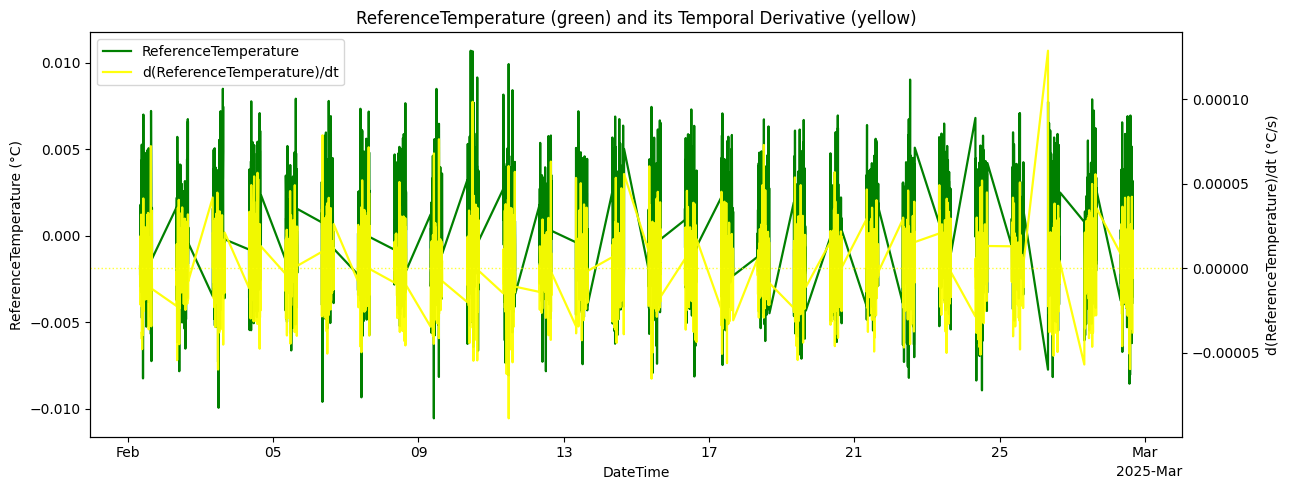

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(13, 5))
line1, = ax1.plot(
    result["DateTime"],
    result["ReferenceTemperature"],
    color="green",
    linewidth=1.6,
    label="ReferenceTemperature",
)
ax1.set_xlabel("DateTime")
ax1.set_ylabel("ReferenceTemperature (°C)")

locator = mdates.AutoDateLocator(minticks=5, maxticks=10)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))
plt.margins(x=0)

ax2 = ax1.twinx()
line2, = ax2.plot(
    result["DateTime"],
    result["ReferenceTemperature_d_dt"],
    color="yellow",
    linewidth=1.6,
    alpha=0.95,
    label="d(ReferenceTemperature)/dt",
)
ax2.axhline(0.0, linestyle=":", linewidth=1.0, alpha=0.8, color="yellow")
ax2.set_ylabel("d(ReferenceTemperature)/dt (°C/s)")

ax1.legend([line1, line2], ["ReferenceTemperature", "d(ReferenceTemperature)/dt"], loc="upper left")
plt.title("ReferenceTemperature (green) and its Temporal Derivative (yellow)")
plt.tight_layout()
plt.show()

# **5.**

In this section, a multivariate analysis is implemented on the database used to align the series over time and calculate Z-scores, covariances, and correlations for SprtTemperature, ReferenceTemperature, and SprtOhms. It prints the number of rows used, time range, means/deviations, and the covariance and correlation matrices.

SprtTemperature and ReferenceTemperature: the std indicates how much thermal variation there is.

SprtOhms: its mean/std must be consistent with the R–T relationship of the sensor (ohms increase with temperature).

cov(SprtTemperature, ReferenceTemperature) positive (both follow the thermal cycle).

cov(SprtTemperature, SprtOhms) and cov(ReferenceTemperature, SprtOhms) positive (R increases with T for SPRT).

corr(SprtTemperature, ReferenceTemperature) high and positive (ideally ≥ 0.95 if they are well synchronized).

corr(ReferenceTemperature, SprtOhms) and corr(SprtTemperature, SprtOhms) positive and high if the R–T relationship is clean in the operating range.

In [26]:
import os
import pandas as pd
import numpy as np
from pathlib import Path


CSV_PATH = None

DATE_COL, TIME_COL, DT_COL = "Date", "Time", "DateTime"
PREFERRED_COLS = ["SprtTemperature", "ReferenceTemperature", "SprtOhms"]
CANDIDATES = [
    Path("/mnt/data/1_DataTime_Point_TPW.csv"),
    Path("./1_DataTime_Point_TPW.csv"),
    Path("/content/drive/MyDrive/s_programing/1_DataTime_Point_TPW.csv"),
]

def find_csv() -> Path:
    tried = []
    if CSV_PATH:
        p = Path(os.path.expanduser(CSV_PATH))
        if p.is_file():
            return p
        tried.append(str(p))
    for p in CANDIDATES:
        if p.is_file():
            return p
        tried.append(str(p))
    for p in Path(".").rglob("1_DataTime_Point_TPW*.csv"):
        if p.is_file():
            return p
    raise FileNotFoundError(f"CSV not found. Tried: {tried} and recursive search under {Path('.').resolve()}.")

def standardize(X: np.ndarray):
    mu = X.mean(axis=0)
    sd = X.std(axis=0, ddof=1)
    sd_safe = np.where(sd == 0, 1.0, sd)
    Z = (X - mu) / sd_safe
    return Z, mu, sd_safe

def covariance_matrix(X: np.ndarray):
    n = X.shape[0]
    if n < 2:
        return np.full((X.shape[1], X.shape[1]), np.nan)
    Xc = X - X.mean(axis=0)
    return (Xc.T @ Xc) / (n - 1)

def correlation_from_Z(Z: np.ndarray):
    n = Z.shape[0]
    if n < 2:
        return np.full((Z.shape[1], Z.shape[1]), np.nan)
    return (Z.T @ Z) / (n - 1)

def main():
    path = find_csv()
    print(f"Using CSV: {path}")

    df = pd.read_csv(path, low_memory=False)

    if DT_COL not in df.columns or not np.issubdtype(df[DT_COL].dtype, np.datetime64):
        if DATE_COL not in df.columns or TIME_COL not in df.columns:
            raise KeyError("Missing 'Date' or 'Time' to build 'DateTime'.")
        df[DT_COL] = pd.to_datetime(df[DATE_COL].astype(str) + " " + df[TIME_COL].astype(str), errors="coerce")

    df = df.dropna(subset=[DT_COL]).sort_values(DT_COL).reset_index(drop=True)

    use_cols = [c for c in PREFERRED_COLS if c in df.columns]
    if not use_cols:
        raise ValueError("None of the preferred columns found.")
    dfX = (
        df.set_index(DT_COL)[use_cols]
          .apply(pd.to_numeric, errors="coerce")
          .sort_index()
          .interpolate(method="time")
          .ffill()
          .bfill()
          .reset_index()
    )
    X = dfX[use_cols].to_numpy(dtype=float)

    Z, mu, sd = standardize(X)
    COV = covariance_matrix(X)
    CORR = correlation_from_Z(Z)

    print("=== MATRIX RESULTS ===")
    print(f"Rows used: {X.shape[0]}")
    print(f"DateTime range: {dfX[DT_COL].min()}  to  {dfX[DT_COL].max()}")
    print("\nMean / Std per column:")
    print(pd.DataFrame({"mean": mu, "std": sd}, index=use_cols).round(6).to_string())
    print("\nCovariance matrix:")
    print(pd.DataFrame(COV, index=use_cols, columns=use_cols).round(6).to_string())
    print("\nCorrelation matrix:")
    print(pd.DataFrame(CORR, index=use_cols, columns=use_cols).round(6).to_string())

if __name__ == "__main__":
    main()


Using CSV: /content/drive/MyDrive/s_programing/1_DataTime_Point_TPW.csv
=== MATRIX RESULTS ===
Rows used: 5000
DateTime range: 2025-02-01 08:00:00  to  2025-02-28 15:54:00

Mean / Std per column:
                             mean       std
SprtTemperature          0.000056  0.002479
ReferenceTemperature     0.000059  0.003040
SprtOhms              1000.000069  0.009777

Covariance matrix:
                      SprtTemperature  ReferenceTemperature  SprtOhms
SprtTemperature              0.000006              0.000000  0.000024
ReferenceTemperature         0.000000              0.000009  0.000001
SprtOhms                     0.000024              0.000001  0.000096

Correlation matrix:
                      SprtTemperature  ReferenceTemperature  SprtOhms
SprtTemperature              1.000000              0.025233  0.977493
ReferenceTemperature         0.025233              1.000000  0.022966
SprtOhms                     0.977493              0.022966  1.000000


# **Covariance heat map**

The covariance heat map indicates that positive colors (more intense tones) indicate that the relationship between magnitudes is directly proportional, while negative colors indicate an inverse relationship.
Positive covariances between SprtTemperature, ReferenceTemperature, and SprtOhms (resistance increases as temperature increases).

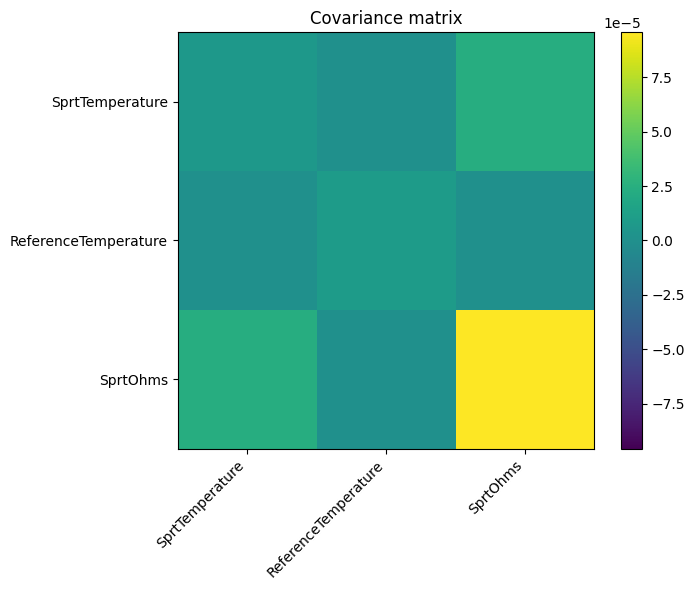

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

DATE_COL, TIME_COL, DT_COL = "Date", "Time", "DateTime"
PREFERRED_COLS = ["SprtTemperature", "ReferenceTemperature", "SprtOhms"]
CANDIDATES = [
    Path("/mnt/data/1_DataTime_Point_TPW.csv"),
    Path("./1_DataTime_Point_TPW.csv"),
    Path("/content/drive/MyDrive/s_programing/1_DataTime_Point_TPW.csv"),
]

def load_df():
    for p in CANDIDATES:
        if p.is_file():
            return pd.read_csv(p, low_memory=False)
    matches = list(Path(".").rglob("1_DataTime_Point_TPW*.csv"))
    if matches:
        return pd.read_csv(matches[0], low_memory=False)
    raise FileNotFoundError("CSV not found in candidates or recursive search.")

def build_X(df):
    if DT_COL not in df.columns or not np.issubdtype(df[DT_COL].dtype, np.datetime64):
        if DATE_COL not in df.columns or TIME_COL not in df.columns:
            raise KeyError("Missing 'Date' or 'Time' to build 'DateTime'.")
        df[DT_COL] = pd.to_datetime(df[DATE_COL].astype(str)+" "+df[TIME_COL].astype(str), errors="coerce")
    df = df.dropna(subset=[DT_COL]).sort_values(DT_COL).reset_index(drop=True)
    use = [c for c in PREFERRED_COLS if c in df.columns]
    if not use:
        raise ValueError("None of the preferred columns found.")
    dfX = (df.set_index(DT_COL)[use]
             .apply(pd.to_numeric, errors="coerce")
             .sort_index()
             .interpolate(method="time")
             .ffill()
             .bfill()
             .reset_index())
    X = dfX[use].to_numpy(dtype=float)
    return dfX, use, X

def covariance_matrix(X):
    n = X.shape[0]
    if n < 2:
        return np.full((X.shape[1], X.shape[1]), np.nan)
    Xc = X - X.mean(axis=0)
    return (Xc.T @ Xc) / (n - 1)

def plot_cov_heatmap(COV, labels):
    rng = np.nanmax(np.abs(COV))
    vmin, vmax = (-rng, rng) if np.isfinite(rng) and rng > 0 else (None, None)
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(np.ma.masked_invalid(COV), vmin=vmin, vmax=vmax)
    ax.set_xticks(range(len(labels))); ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_yticks(range(len(labels))); ax.set_yticklabels(labels)
    ax.set_title("Covariance matrix")
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout(); plt.show()

df = load_df()
_, use_cols, X = build_X(df)
COV = covariance_matrix(X)
plot_cov_heatmap(COV, use_cols)

## **Correlation heat map**

El mapa de calor de correlación indica mide la fuerza y dirección de la relación lineal.

1 = Relación directa perfecta
0 = Sin linealidad
-1 = Inversa Perfecta

En este caso de nuestra base de datos, la correlación es alta y positiva entre las dos temperaturas; correlación positiva de SprtOhms con ambas Temperaturas (SprtTemperature, ReferenceTemperature).

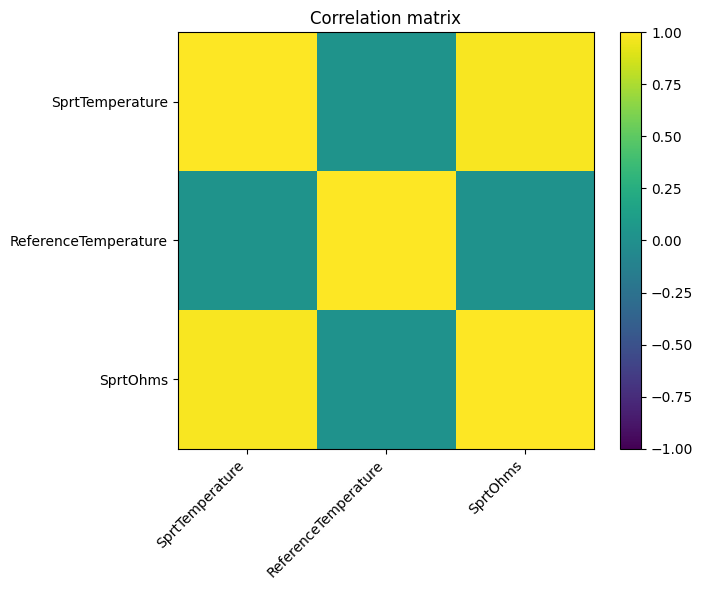

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

DATE_COL, TIME_COL, DT_COL = "Date", "Time", "DateTime"
PREFERRED_COLS = ["SprtTemperature", "ReferenceTemperature", "SprtOhms"]
CANDIDATES = [
    Path("/mnt/data/1_DataTime_Point_TPW.csv"),
    Path("./1_DataTime_Point_TPW.csv"),
    Path("/content/drive/MyDrive/s_programing/1_DataTime_Point_TPW.csv"),
]

def load_df():
    for p in CANDIDATES:
        if p.is_file():
            return pd.read_csv(p, low_memory=False)
    matches = list(Path(".").rglob("1_DataTime_Point_TPW*.csv"))
    if matches:
        return pd.read_csv(matches[0], low_memory=False)
    raise FileNotFoundError("CSV not found in candidates or recursive search.")

def build_X(df):
    if DT_COL not in df.columns or not np.issubdtype(df[DT_COL].dtype, np.datetime64):
        if DATE_COL not in df.columns or TIME_COL not in df.columns:
            raise KeyError("Missing 'Date' or 'Time' to build 'DateTime'.")
        df[DT_COL] = pd.to_datetime(df[DATE_COL].astype(str)+" "+df[TIME_COL].astype(str), errors="coerce")
    df = df.dropna(subset=[DT_COL]).sort_values(DT_COL).reset_index(drop=True)
    use = [c for c in PREFERRED_COLS if c in df.columns]
    if not use:
        raise ValueError("None of the preferred columns found.")
    dfX = (df.set_index(DT_COL)[use]
             .apply(pd.to_numeric, errors="coerce")
             .sort_index()
             .interpolate(method="time")
             .ffill()
             .bfill()
             .reset_index())
    X = dfX[use].to_numpy(dtype=float)
    return dfX, use, X

def standardize(X):
    mu = X.mean(axis=0)
    sd = X.std(axis=0, ddof=1)
    sd_safe = np.where(sd == 0, 1.0, sd)
    Z = (X - mu) / sd_safe
    return Z

def correlation_from_Z(Z):
    n = Z.shape[0]
    if n < 2:
        return np.full((Z.shape[1], Z.shape[1]), np.nan)
    return (Z.T @ Z) / (n - 1)

def plot_corr_heatmap(CORR, labels):
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(np.ma.masked_invalid(CORR), vmin=-1, vmax=1)
    ax.set_xticks(range(len(labels))); ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_yticks(range(len(labels))); ax.set_yticklabels(labels)
    ax.set_title("Correlation matrix")
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout(); plt.show()

df = load_df()
_, use_cols, X = build_X(df)
Z = standardize(X)
CORR = correlation_from_Z(Z)
plot_corr_heatmap(CORR, use_cols)

# **Conclusions**

According to the exploratory data analysis performed on the selected dataset, normal distribution behavior is observed in the data collected during February 2025, specifically for the values recorded for the equipment under test (SprtTemperature) and the reference standard equipment (ReferenceTemperature). The values of the equipment under test in its transducer function (SprtOhms) are stable and directly proportional to the temperature values of the reference equipment, the equipment under test, and the triple point of water, the latter being the stable medium for measurement at the control point of 0 °C.


Since the process is carried out to obtain the behavior and analysis as a function of time in the equipment under test (SprtTemperature), a mismatch or difference is observed in direct comparison with the reference standard equipment (ReferenceTemperature) when we calculate a daily average of the measurements and obtain the standard deviation. It is decided to correct the SprtTemperature values, obtaining a control graph that matches the values of the reference equipment (ReferenceTemperature). It is recommended that the same adjustment be made to the controller algorithm in order to perform new stability tests at 0 °C using the same medium, the triple point cell of water. It is also considered necessary to make a correction taking into account all sources of uncertainty associated with the process, in order to avoid possible disturbances in the medium, environmental conditions of the facilities, and the equipment involved in the process.

The implemented covariances and correlations indicate ideal behavior of the measuring equipment in direct proportion to the control point and the recorded temperature changes.

# **Bibliographic Reference**

Wiandt, T. J. (2007). SPRT Calibration Uncertainties and Internal Quality Control at a Commercial SPRT Calibration Facility